<a href="https://colab.research.google.com/github/GMkrrish/CodeAlpha_DiseasePredictionfromMedicalData/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install xgboost -q

In [7]:
!pip install imbalanced-learn -q

✓ All libraries imported successfully!

LOADING MEDICAL DATASETS

1. Loading Heart Disease Dataset...
   ✓ Heart Disease dataset loaded: (303, 14)

2. Loading Diabetes Dataset...
   ✓ Diabetes dataset loaded: (768, 9)

------------------------------------------------------------
DATASET OVERVIEW
------------------------------------------------------------

Heart Disease Dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    

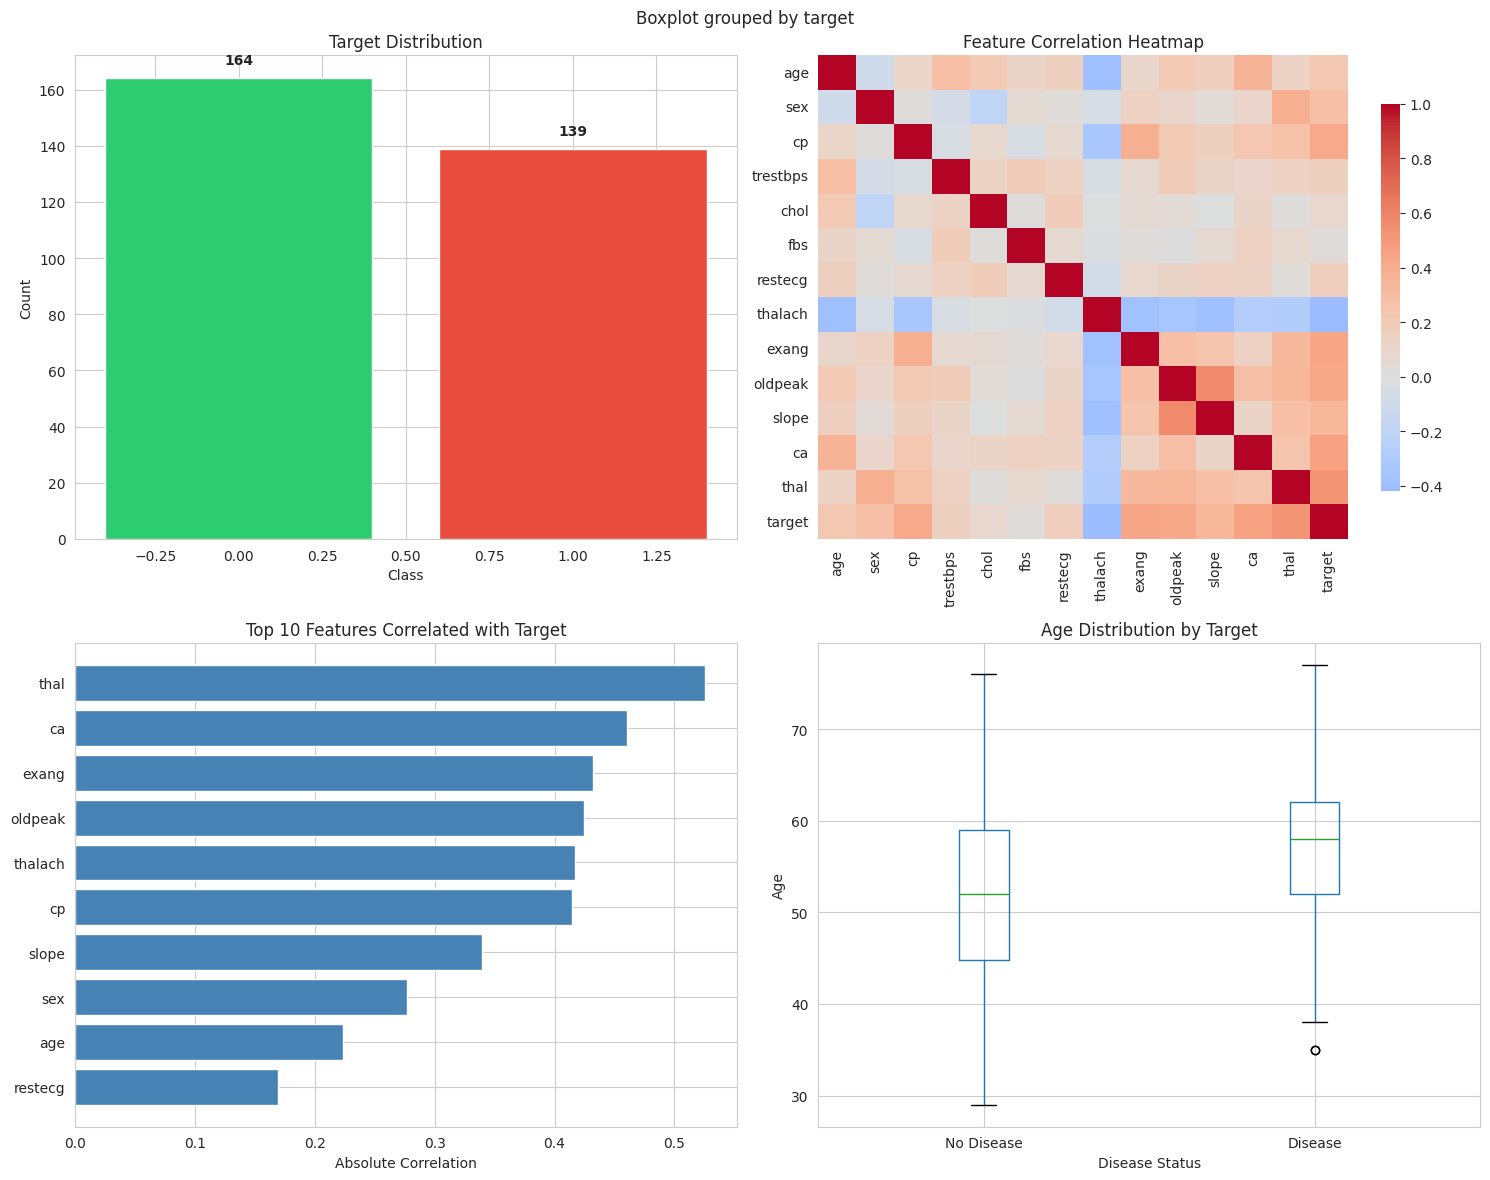

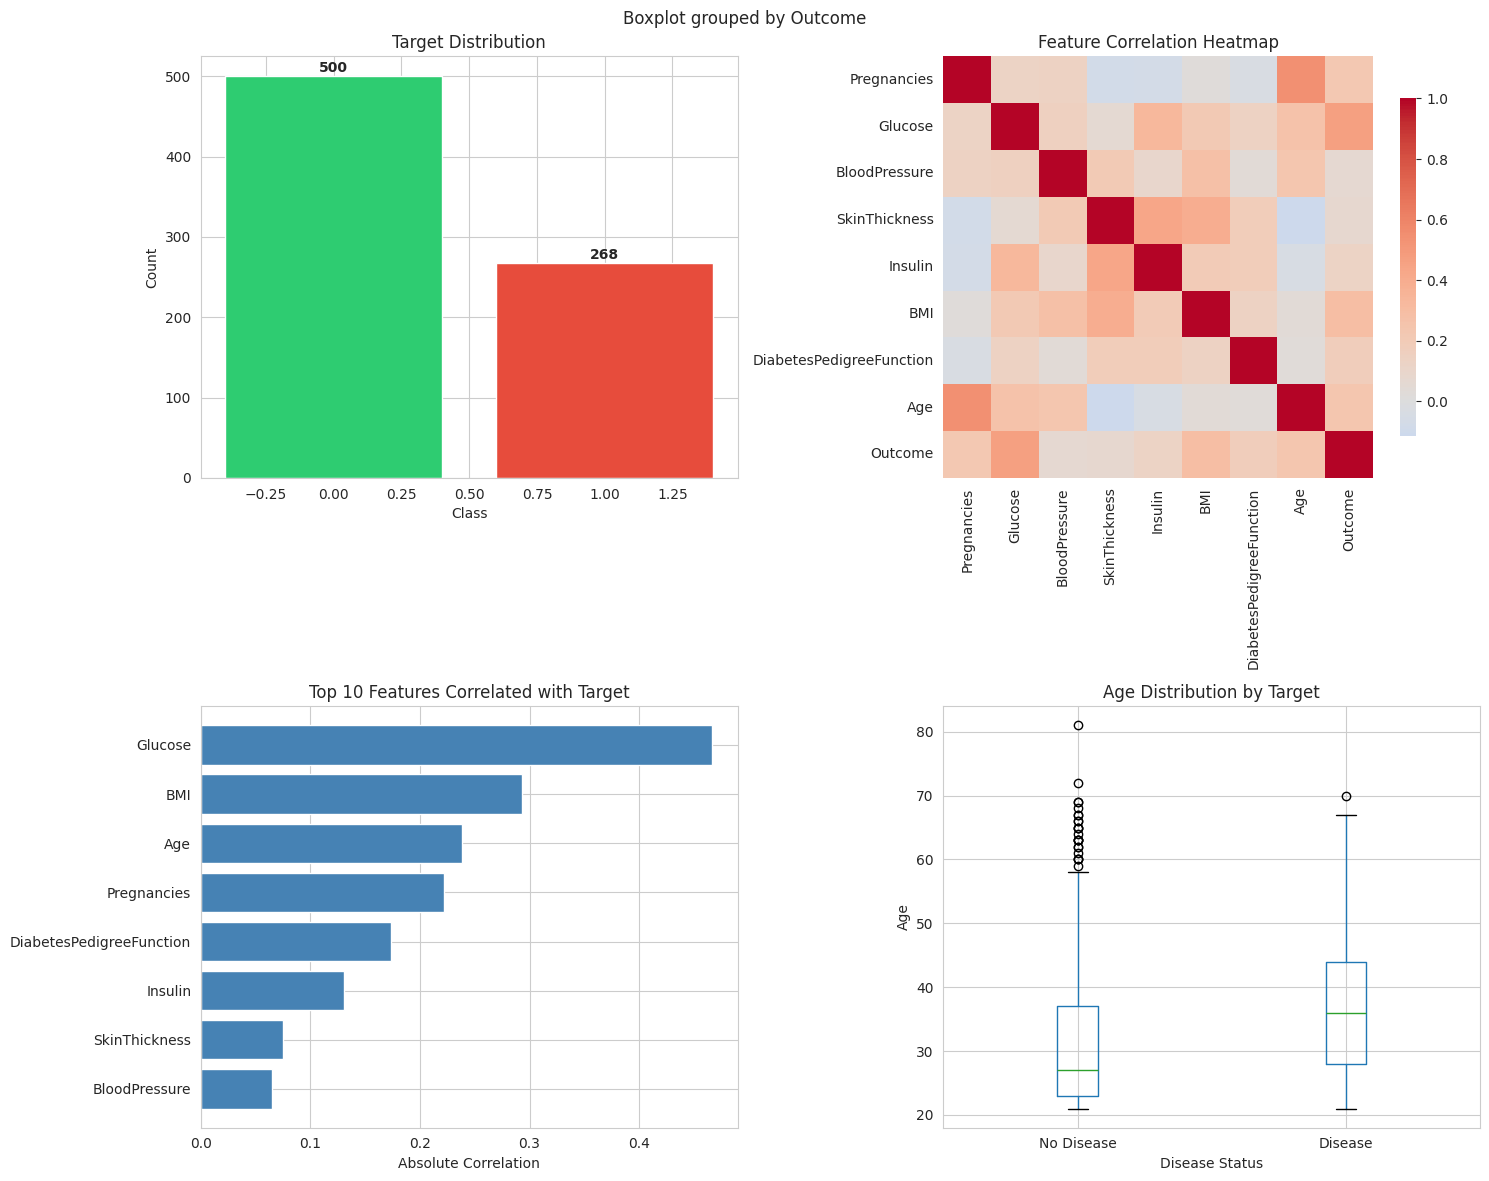


MODEL TRAINING & EVALUATION

TRAINING MODELS ON HEART DISEASE

Training set: 242 samples
Testing set: 61 samples

------------------------------------------------------------
Training Logistic Regression...
   Accuracy:  0.8689
   Precision: 0.8125
   Recall:    0.9286
   F1-Score:  0.8667
   ROC-AUC:   0.9513
   CV Score:  0.8263 (+/- 0.0534)

------------------------------------------------------------
Training SVM...
   Accuracy:  0.8525
   Precision: 0.8065
   Recall:    0.8929
   F1-Score:  0.8475
   ROC-AUC:   0.9437
   CV Score:  0.8262 (+/- 0.0487)

------------------------------------------------------------
Training Random Forest...
   Accuracy:  0.8852
   Precision: 0.8182
   Recall:    0.9643
   F1-Score:  0.8852
   ROC-AUC:   0.9513
   CV Score:  0.8055 (+/- 0.0415)

------------------------------------------------------------
Training Gradient Boosting...
   Accuracy:  0.8525
   Precision: 0.7879
   Recall:    0.9286
   F1-Score:  0.8525
   ROC-AUC:   0.9459
   CV Score:

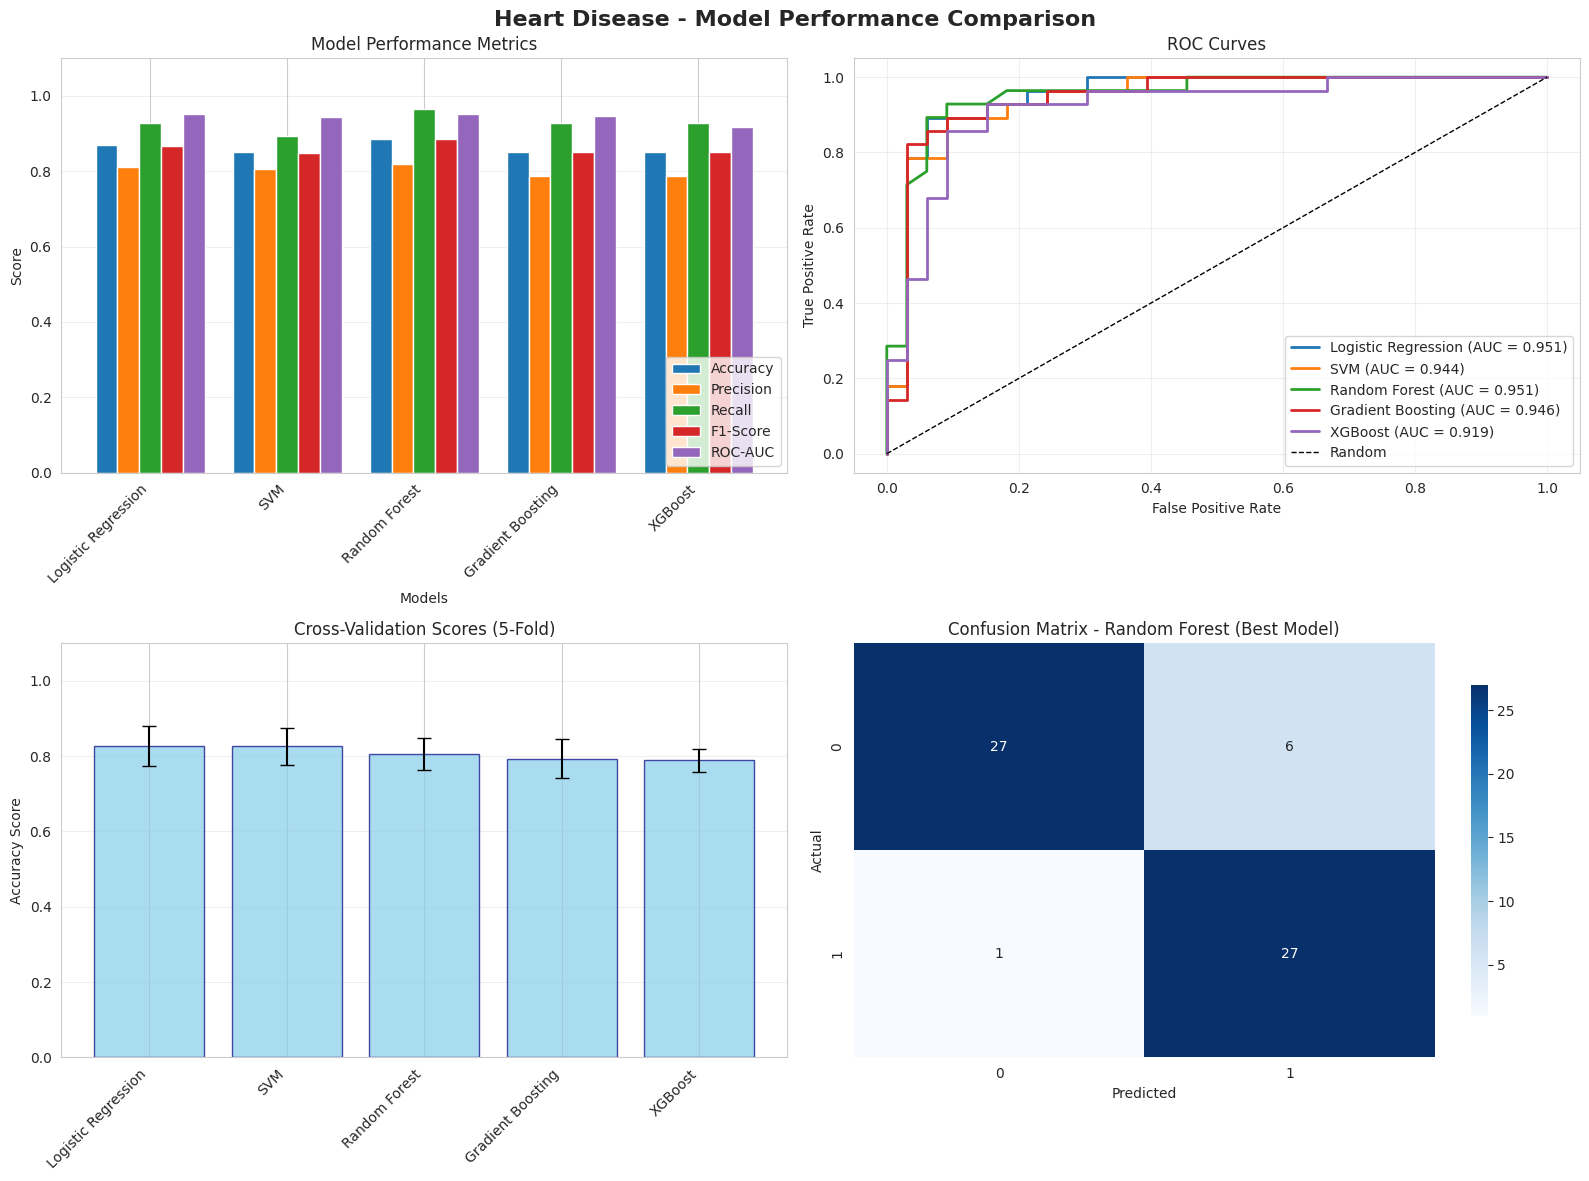


Heart Disease - BEST MODEL SUMMARY

Best Model: Random Forest
Accuracy: 0.8852

Detailed Results:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC  CV Mean  \
Logistic Regression    0.8689     0.8125  0.9286    0.8667   0.9513   0.8263   
SVM                    0.8525     0.8065  0.8929    0.8475   0.9437   0.8262   
Random Forest          0.8852     0.8182  0.9643    0.8852   0.9513   0.8055   
Gradient Boosting      0.8525     0.7879  0.9286    0.8525   0.9459   0.7931   
XGBoost                0.8525     0.7879  0.9286    0.8525   0.9188   0.7892   

                     CV Std  
Logistic Regression  0.0534  
SVM                  0.0487  
Random Forest        0.0415  
Gradient Boosting    0.0518  
XGBoost              0.0308  

DIABETES RESULTS


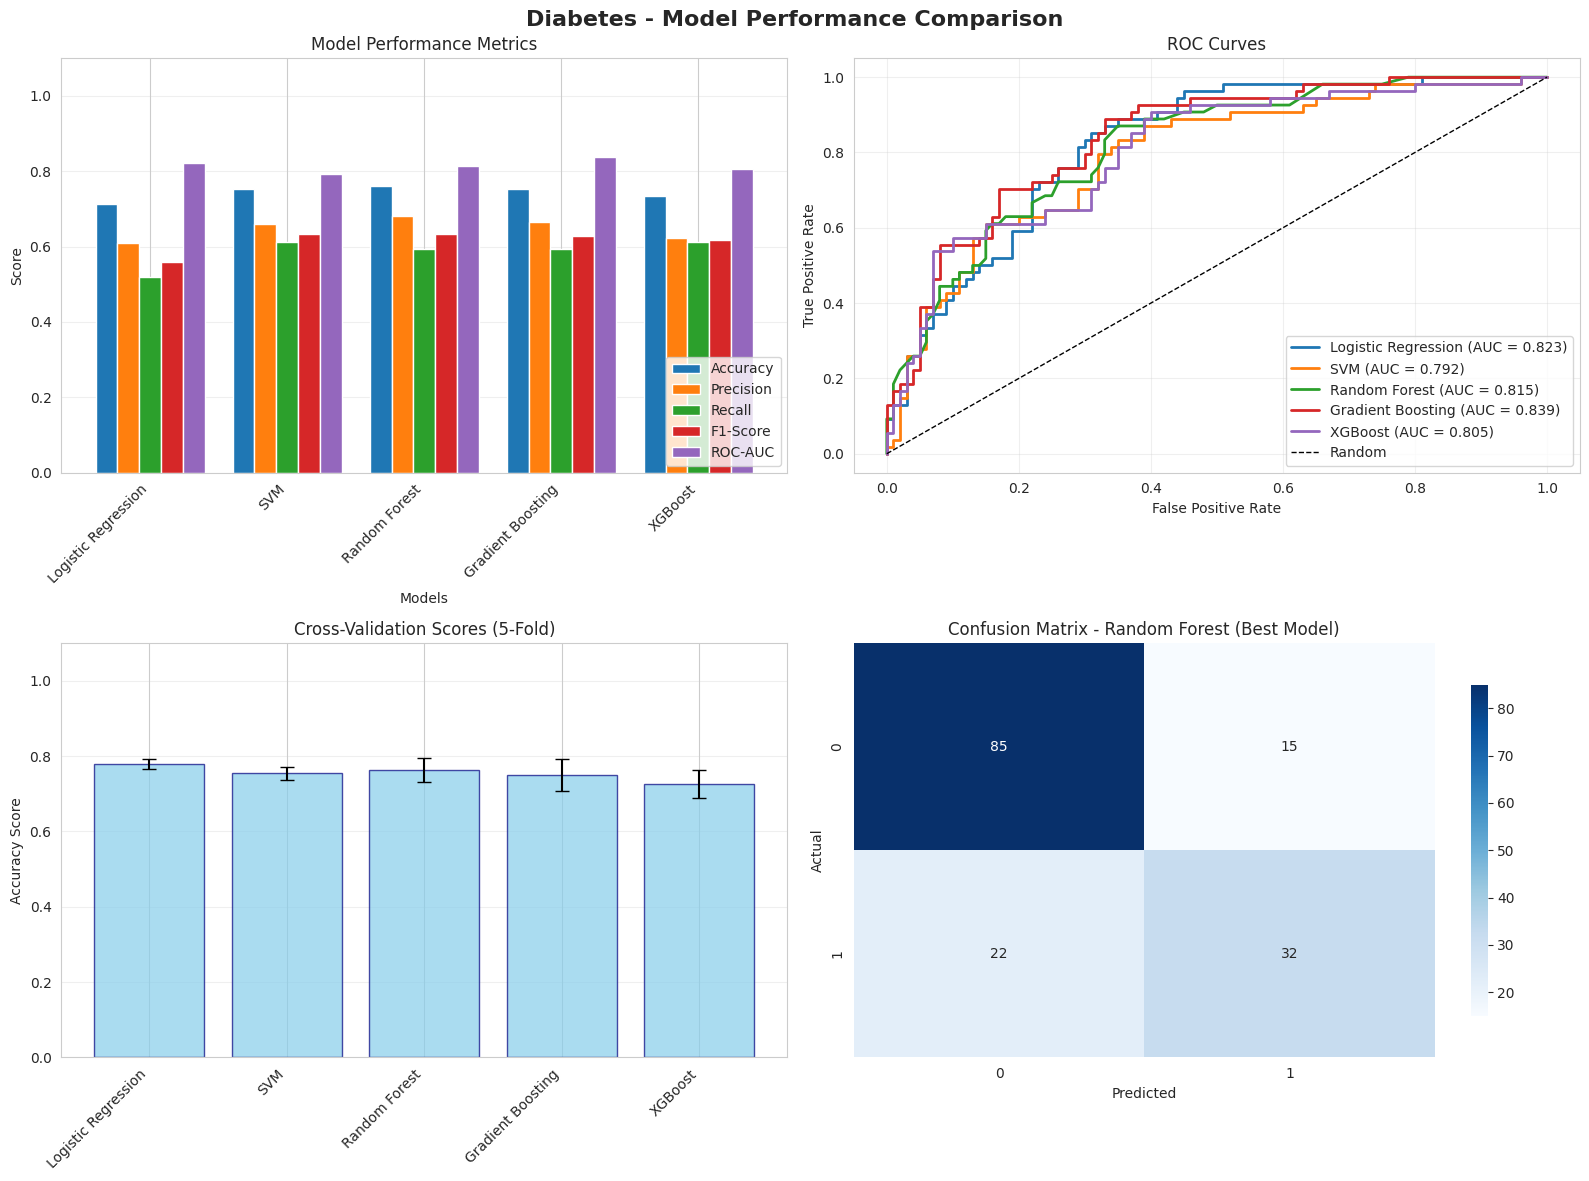


Diabetes - BEST MODEL SUMMARY

Best Model: Random Forest
Accuracy: 0.7597

Detailed Results:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC  CV Mean  \
Logistic Regression    0.7143     0.6087  0.5185    0.5600   0.8230   0.7785   
SVM                    0.7532     0.6600  0.6111    0.6346   0.7924   0.7541   
Random Forest          0.7597     0.6809  0.5926    0.6337   0.8147   0.7639   
Gradient Boosting      0.7532     0.6667  0.5926    0.6275   0.8389   0.7493   
XGBoost                0.7338     0.6226  0.6111    0.6168   0.8052   0.7264   

                     CV Std  
Logistic Regression  0.0126  
SVM                  0.0166  
Random Forest        0.0314  
Gradient Boosting    0.0430  
XGBoost              0.0370  

PREDICTION DEMONSTRATION

Example: Heart Disease Prediction
------------------------------------------------------------
Sample Patient Features:
  age: 56.00
  sex: 1.00
  cp: 3.00
  trestbps: 130.00
  chol: 241.00
  fbs: 0.00
  restecg: 1.00


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

# ==================== DATASET LOADING ====================
print("\n" + "="*60)
print("LOADING MEDICAL DATASETS")
print("="*60)

# Option 1: Heart Disease Dataset (UCI ML Repository)
from sklearn.datasets import fetch_openml

# Load Heart Disease dataset
print("\n1. Loading Heart Disease Dataset...")
try:
    heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                             header=None)
    heart_data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                          'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
    heart_data = heart_data.replace('?', np.nan)
    heart_data = heart_data.apply(pd.to_numeric)
    heart_data['target'] = (heart_data['target'] > 0).astype(int)
    print(f"   ✓ Heart Disease dataset loaded: {heart_data.shape}")
except:
    print("   ✗ Error loading from UCI. Using alternative source...")
    # Alternative source
    url = "https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/heart.csv"
    heart_data = pd.read_csv(url)
    print(f"   ✓ Heart Disease dataset loaded: {heart_data.shape}")

# Option 2: Diabetes Dataset
print("\n2. Loading Diabetes Dataset...")
diabetes_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
diabetes_data = pd.read_csv(diabetes_url, header=None)
diabetes_data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
print(f"   ✓ Diabetes dataset loaded: {diabetes_data.shape}")

# Display dataset info
print("\n" + "-"*60)
print("DATASET OVERVIEW")
print("-"*60)
print("\nHeart Disease Dataset:")
print(heart_data.head())
print(f"\nShape: {heart_data.shape}")
print(f"Missing values: {heart_data.isnull().sum().sum()}")

print("\nDiabetes Dataset:")
print(diabetes_data.head())
print(f"\nShape: {diabetes_data.shape}")
print(f"Missing values: {diabetes_data.isnull().sum().sum()}")

# ==================== DATA PREPROCESSING ====================
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

def preprocess_data(df, target_col):
    """Preprocess medical data"""
    print(f"\nProcessing dataset with target: '{target_col}'")


    if df.isnull().sum().sum() > 0:
        print(f"   - Handling {df.isnull().sum().sum()} missing values")
        df = df.fillna(df.median())


    X = df.drop(target_col, axis=1)
    y = df[target_col]


    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

    print(f"   ✓ Features: {X.shape[1]}, Samples: {X.shape[0]}")
    print(f"   ✓ Class distribution: {dict(y.value_counts())}")

    return X, y


X_heart, y_heart = preprocess_data(heart_data, 'target')

X_diabetes, y_diabetes = preprocess_data(diabetes_data, 'Outcome')


print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

def plot_eda(df, target_col, dataset_name):
    """Create EDA visualizations"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'{dataset_name} - Exploratory Data Analysis', fontsize=16, fontweight='bold')


    target_counts = df[target_col].value_counts()
    axes[0, 0].bar(target_counts.index, target_counts.values, color=['#2ecc71', '#e74c3c'])
    axes[0, 0].set_title('Target Distribution')
    axes[0, 0].set_xlabel('Class')
    axes[0, 0].set_ylabel('Count')
    for i, v in enumerate(target_counts.values):
        axes[0, 0].text(i, v + 5, str(v), ha='center', fontweight='bold')


    corr = df.corr()
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, ax=axes[0, 1], cbar_kws={'shrink': 0.8})
    axes[0, 1].set_title('Feature Correlation Heatmap')

    target_corr = abs(corr[target_col]).sort_values(ascending=False)[1:11]
    axes[1, 0].barh(range(len(target_corr)), target_corr.values, color='steelblue')
    axes[1, 0].set_yticks(range(len(target_corr)))
    axes[1, 0].set_yticklabels(target_corr.index)
    axes[1, 0].set_xlabel('Absolute Correlation')
    axes[1, 0].set_title('Top 10 Features Correlated with Target')
    axes[1, 0].invert_yaxis()

    age_col = [col for col in df.columns if 'age' in col.lower()]
    if age_col:
        df.boxplot(column=age_col[0], by=target_col, ax=axes[1, 1])
        axes[1, 1].set_title(f'{age_col[0].capitalize()} Distribution by Target')
        axes[1, 1].set_xlabel('Disease Status')
        axes[1, 1].set_ylabel(age_col[0].capitalize())
        plt.sca(axes[1, 1])
        plt.xticks([1, 2], ['No Disease', 'Disease'])
    else:
        axes[1, 1].axis('off')
        axes[1, 1].text(0.5, 0.5, 'Age data not available', ha='center', va='center', fontsize=12)

    plt.tight_layout()
    plt.show()


plot_eda(heart_data, 'target', 'Heart Disease Dataset')

plot_eda(diabetes_data, 'Outcome', 'Diabetes Dataset')


print("\n" + "="*60)
print("MODEL TRAINING & EVALUATION")
print("="*60)

def train_and_evaluate_models(X, y, dataset_name):
    """Train multiple classification models and evaluate"""

    print(f"\n{'='*60}")
    print(f"TRAINING MODELS ON {dataset_name.upper()}")
    print('='*60)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"\nTraining set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")


    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
    }

    results = {}
    predictions = {}


    for name, model in models.items():
        print(f"\n{'-'*60}")
        print(f"Training {name}...")


        model.fit(X_train_scaled, y_train)


        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_pred_proba)


        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'CV Mean': cv_scores.mean(),
            'CV Std': cv_scores.std()
        }

        predictions[name] = {
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }

        print(f"   Accuracy:  {accuracy:.4f}")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall:    {recall:.4f}")
        print(f"   F1-Score:  {f1:.4f}")
        print(f"   ROC-AUC:   {roc_auc:.4f}")
        print(f"   CV Score:  {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    return results, predictions, X_test_scaled, y_test, models


results_heart, predictions_heart, X_test_heart, y_test_heart, models_heart = train_and_evaluate_models(
    X_heart, y_heart, "Heart Disease"
)


results_diabetes, predictions_diabetes, X_test_diabetes, y_test_diabetes, models_diabetes = train_and_evaluate_models(
    X_diabetes, y_diabetes, "Diabetes"
)

# ==================== RESULTS VISUALIZATION ====================
print("\n" + "="*60)
print("RESULTS VISUALIZATION")
print("="*60)

def plot_results(results, predictions, y_test, dataset_name):
    """Visualize model performance"""

    # Create results dataframe
    results_df = pd.DataFrame(results).T

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{dataset_name} - Model Performance Comparison', fontsize=16, fontweight='bold')


    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
    results_df[metrics_to_plot].plot(kind='bar', ax=axes[0, 0], width=0.8)
    axes[0, 0].set_title('Model Performance Metrics')
    axes[0, 0].set_xlabel('Models')
    axes[0, 0].set_ylabel('Score')
    axes[0, 0].legend(loc='lower right')
    axes[0, 0].set_ylim([0, 1.1])
    axes[0, 0].grid(axis='y', alpha=0.3)
    plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

    for name, pred in predictions.items():
        fpr, tpr, _ = roc_curve(y_test, pred['y_pred_proba'])
        auc = roc_auc_score(y_test, pred['y_pred_proba'])
        axes[0, 1].plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

    axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('ROC Curves')
    axes[0, 1].legend(loc='lower right')
    axes[0, 1].grid(alpha=0.3)


    cv_data = results_df[['CV Mean', 'CV Std']]
    x_pos = np.arange(len(cv_data))
    axes[1, 0].bar(x_pos, cv_data['CV Mean'], yerr=cv_data['CV Std'],
                   capsize=5, color='skyblue', edgecolor='navy', alpha=0.7)
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(cv_data.index, rotation=45, ha='right')
    axes[1, 0].set_ylabel('Accuracy Score')
    axes[1, 0].set_title('Cross-Validation Scores (5-Fold)')
    axes[1, 0].set_ylim([0, 1.1])
    axes[1, 0].grid(axis='y', alpha=0.3)


    best_model = results_df['Accuracy'].idxmax()
    cm = confusion_matrix(y_test, predictions[best_model]['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1], cbar_kws={'shrink': 0.8})
    axes[1, 1].set_title(f'Confusion Matrix - {best_model} (Best Model)')
    axes[1, 1].set_xlabel('Predicted')
    axes[1, 1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()


    print(f"\n{'='*60}")
    print(f"{dataset_name} - BEST MODEL SUMMARY")
    print('='*60)
    print(f"\nBest Model: {best_model}")
    print(f"Accuracy: {results_df.loc[best_model, 'Accuracy']:.4f}")
    print(f"\nDetailed Results:")
    print(results_df.round(4))

    return results_df


print("\n" + "="*60)
print("HEART DISEASE RESULTS")
print("="*60)
results_df_heart = plot_results(results_heart, predictions_heart, y_test_heart, "Heart Disease")

print("\n" + "="*60)
print("DIABETES RESULTS")
print("="*60)
results_df_diabetes = plot_results(results_diabetes, predictions_diabetes, y_test_diabetes, "Diabetes")

# ==================== MODEL PREDICTION FUNCTION ====================
print("\n" + "="*60)
print("PREDICTION DEMONSTRATION")
print("="*60)

def predict_disease(model, scaler, patient_data, feature_names):
    """Make prediction for new patient data"""

    patient_df = pd.DataFrame([patient_data], columns=feature_names)


    patient_scaled = scaler.transform(patient_df)


    prediction = model.predict(patient_scaled)[0]
    probability = model.predict_proba(patient_scaled)[0]

    return prediction, probability


print("\nExample: Heart Disease Prediction")
print("-" * 60)


best_model_name_heart = results_df_heart['Accuracy'].idxmax()
best_model_heart = models_heart[best_model_name_heart]


scaler_heart = StandardScaler()
scaler_heart.fit(X_heart)

# Sample patient data (using median values from dataset)
sample_patient = X_heart.median().values
print("Sample Patient Features:")
for i, (col, val) in enumerate(zip(X_heart.columns, sample_patient)):
    print(f"  {col}: {val:.2f}")

prediction, probability = predict_disease(best_model_heart, scaler_heart, sample_patient, X_heart.columns)

print(f"\n{'='*60}")
print(f"PREDICTION RESULT ({best_model_name_heart})")
print('='*60)
print(f"Prediction: {'DISEASE DETECTED' if prediction == 1 else 'NO DISEASE'}")
print(f"Confidence: {probability[prediction]*100:.2f}%")
print(f"Probability Breakdown:")
print(f"  - No Disease: {probability[0]*100:.2f}%")
print(f"  - Disease:    {probability[1]*100:.2f}%")

# ==================== FINAL SUMMARY ====================
print("\n" + "="*60)
print("PROJECT COMPLETION SUMMARY")
print("="*60)

print("\nKey Achievements:")
print("  ✓ Loaded and preprocessed medical datasets (Heart Disease & Diabetes)")
print("  ✓ Performed comprehensive exploratory data analysis")
print("  ✓ Implemented multiple classification algorithms:")
print("    - Logistic Regression")
print("    - Support Vector Machine (SVM)")
print("    - Random Forest")
print("    - Gradient Boosting")
print("    - XGBoost")
print(f"  ✓ Best Heart Disease Model: {results_df_heart['Accuracy'].idxmax()} ({results_df_heart['Accuracy'].max():.4f})")
print(f"  ✓ Best Diabetes Model: {results_df_diabetes['Accuracy'].idxmax()} ({results_df_diabetes['Accuracy'].max():.4f})")
print("  ✓ Evaluated using Precision, Recall, F1-Score, ROC-AUC")
print("  ✓ Created comprehensive visualizations")

print("="*60)